# TabPFGen: Synthetic Tabular Data Generation with TabPFN

TabPFGen is a Python library that addresses one of the common challenges in machine learning: generating high-quality synthetic tabular data. While there are many tools available for generating synthetic images or text, creating realistic tabular data that preserves the statistical properties and relationships of the original dataset has been more challenging.

The library uses energy-based modeling and stochastic gradient Langevin dynamics (SGLD) to generate synthetic data for both classification and regression tasks. This is particularly useful in scenarios where:

1. You have limited real data but need more samples for training
2. You can't share real data due to privacy concerns
3. You need to balance an imbalanced dataset
4. You want to test how your models would perform with more data

What makes TabPFGen interesting is that it's built on the TabPFN transformer architecture and doesn't require additional training. It includes built-in visualization tools to help you verify the quality of the generated data by comparing distributions, feature correlations, and other important metrics between the real and synthetic datasets.

The TabPFGen Python implementation is inspired by the article: Ma, Junwei, et al. "TabPFGen--Tabular Data Generation with TabPFN." arXiv preprint arXiv:2406.05216 (2024).

## Install

In [1]:
!pip install tabpfgen

In [2]:
from tabpfgen import TabPFGen
from tabpfgen.visuals import visualize_classification_results, visualize_regression_results
from sklearn.datasets import load_breast_cancer, load_diabetes

## Example for generating synthetic data for classification

Here we use the scikit-learn breast_cancer dataset and generate 100 new synthetic samples 

In [3]:
# Load data
X, y = load_breast_cancer(return_X_y=True)

# Initialize generator
generator = TabPFGen(n_sgld_steps=500)

# Generate synthetic data
X_synth, y_synth = generator.generate_classification(
    X, y,
    n_samples=100,
    balance_classes=True
)

Step 0/500
Step 100/500
Step 200/500
Step 300/500
Step 400/500


### Visualize Results

The generated plots show:

- Class distribution comparison
- t-SNE visualization of feature space
- Feature importance analysis
- Feature distribution comparisons
- Feature correlation matrices

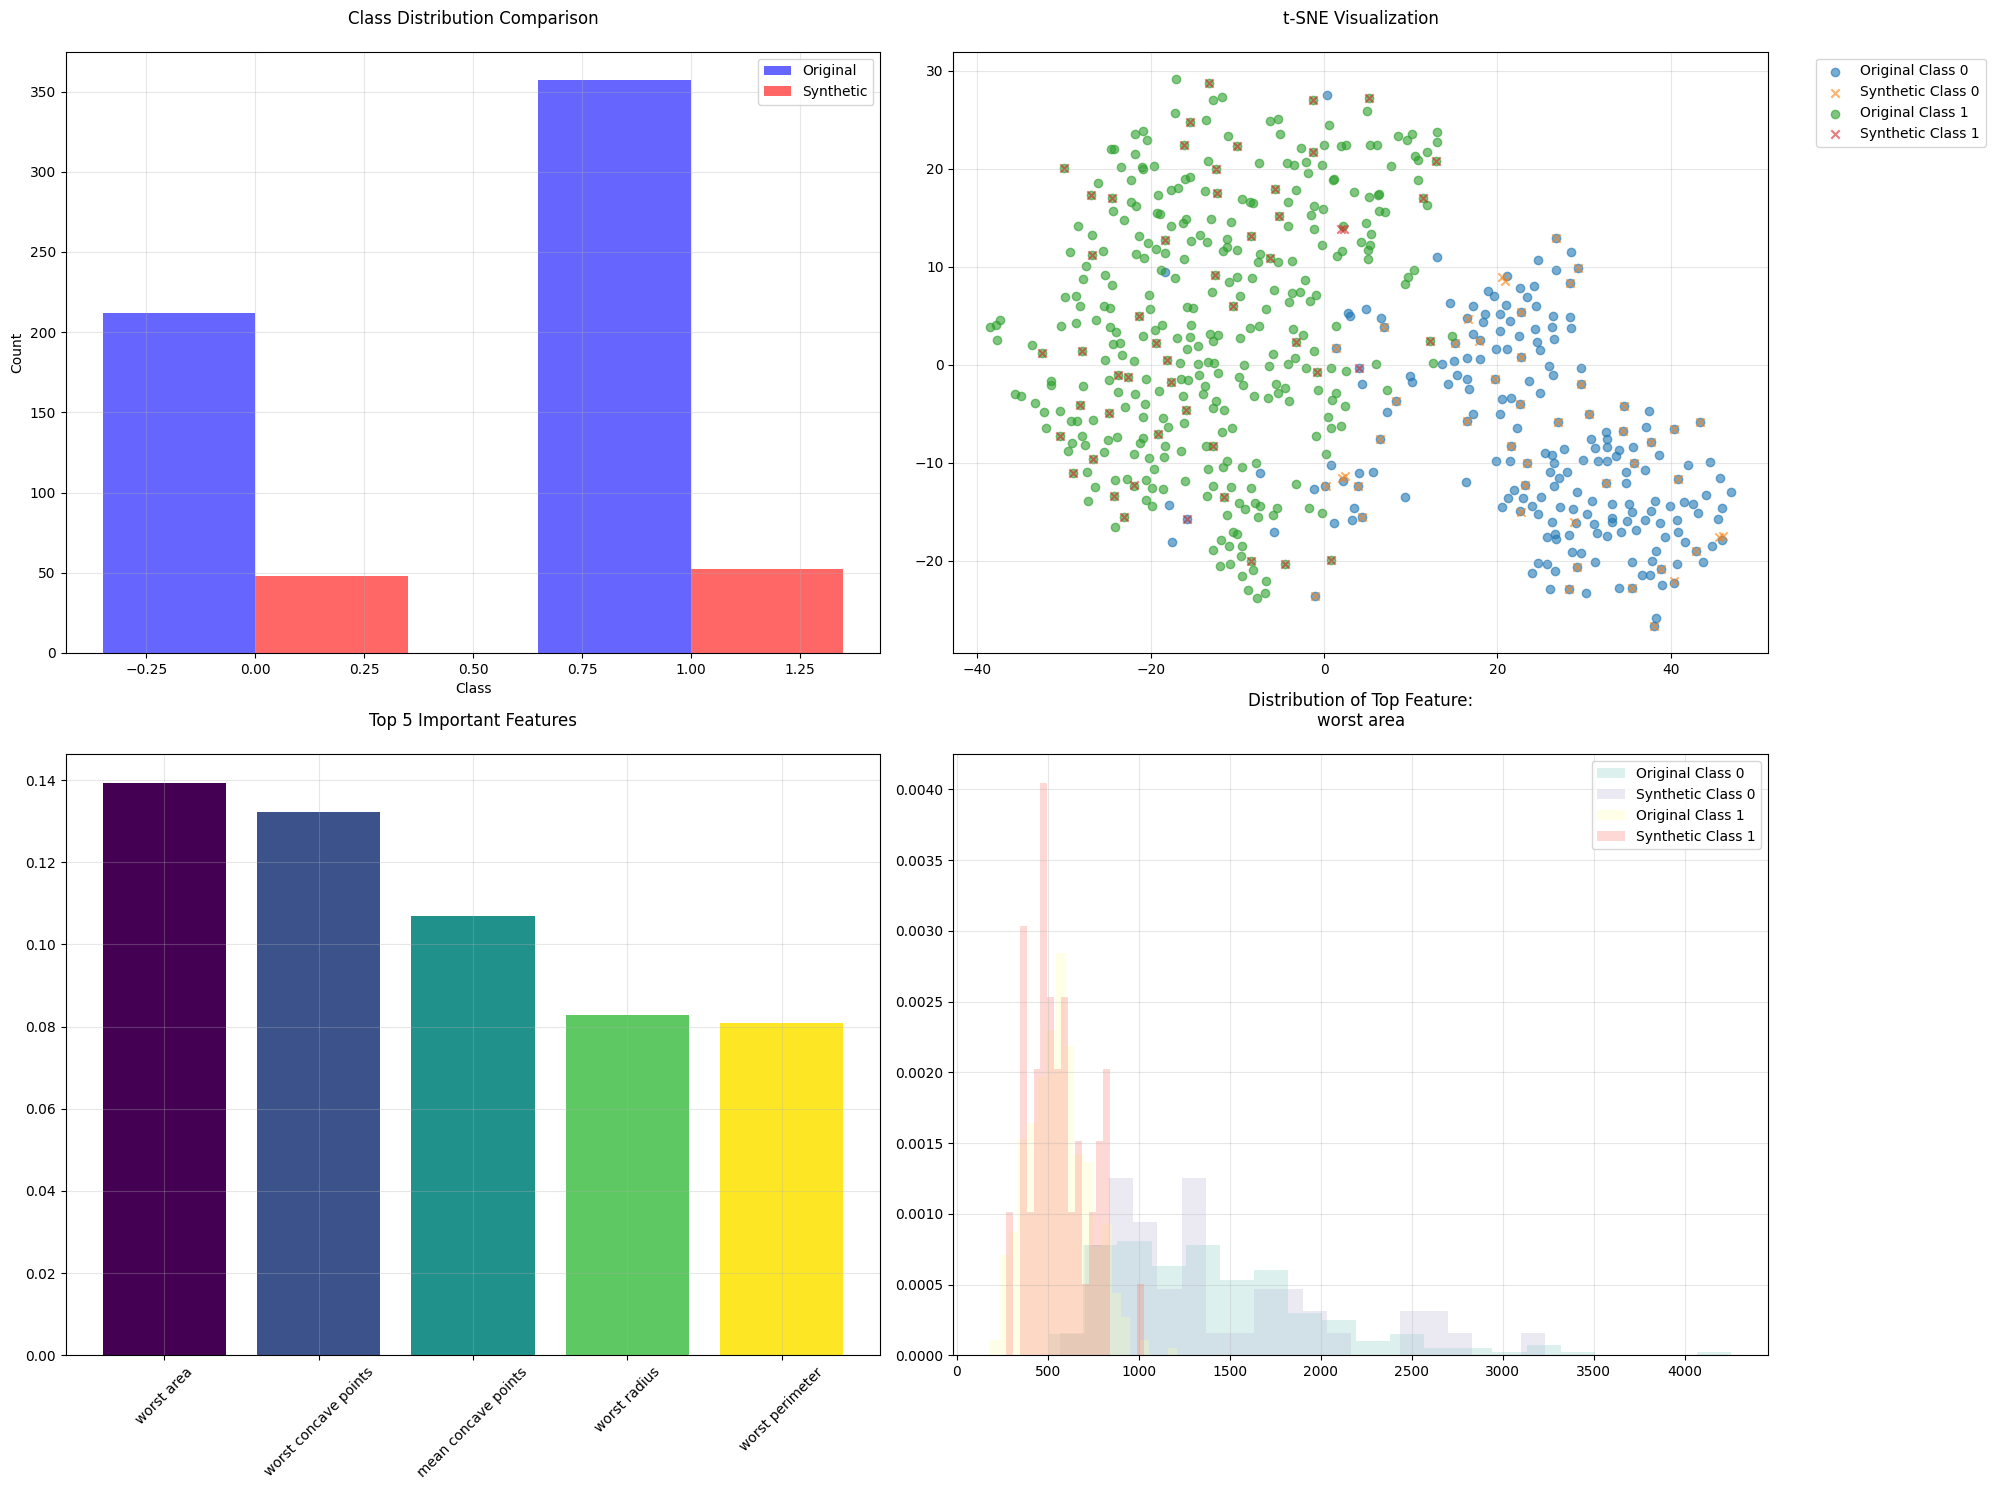

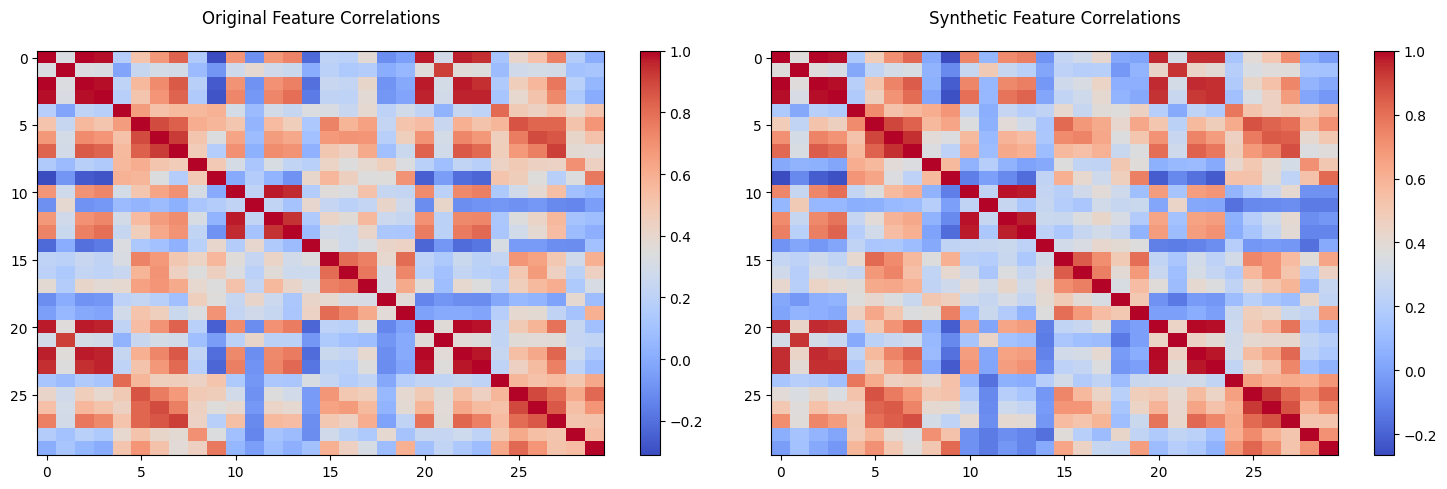

In [4]:
visualize_classification_results(
    X, y, X_synth, y_synth,
    feature_names=load_breast_cancer().feature_names
)

## Example for generating synthetic data for regression

Here we use the scikit-learn diabetes dataset and generate 100 new synthetic samples 

In [5]:
# Load regression dataset
X, y = load_diabetes(return_X_y=True)

# Initialize generator
generator = TabPFGen(n_sgld_steps=500)

# Generate synthetic regression data
X_synth, y_synth = generator.generate_regression(
    X, y,
    n_samples=100,
    use_quantiles=True
)

Step 0/500
Step 100/500
Step 200/500
Step 300/500
Step 400/500


### Visualize Results

Shown are:

- Target value distribution comparison
- Q-Q plots for distribution analysis
- Box plot comparisons
- Feature importance analysis
- Scatter plots of important features
- t-SNE visualization with target value mapping
- Residuals analysis
- Feature correlation difference matrices

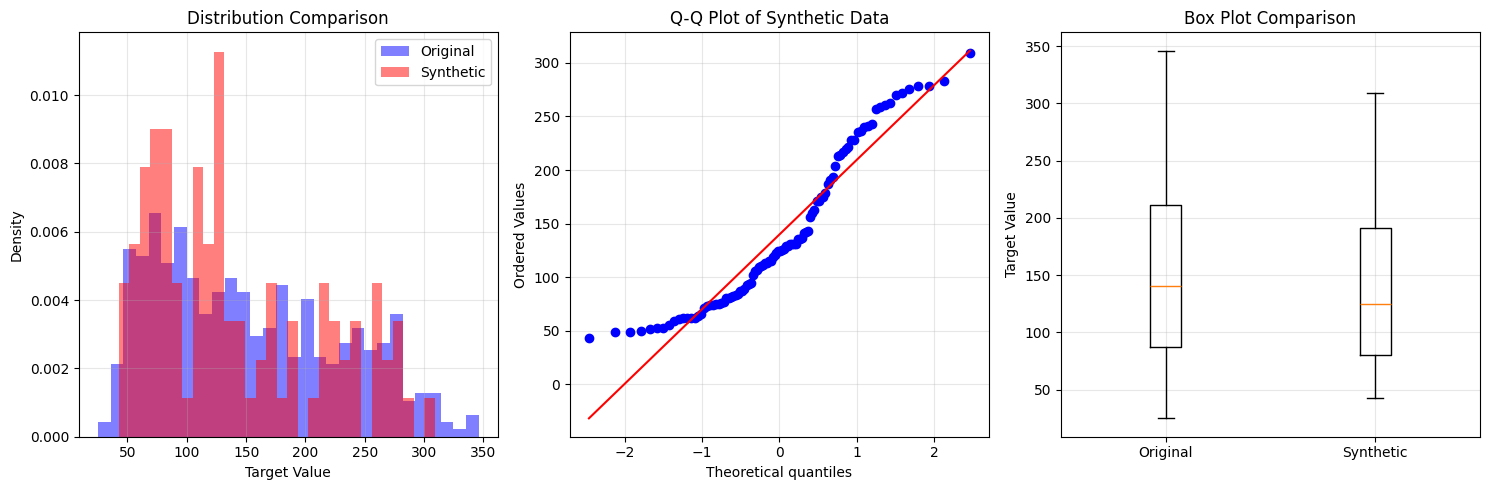

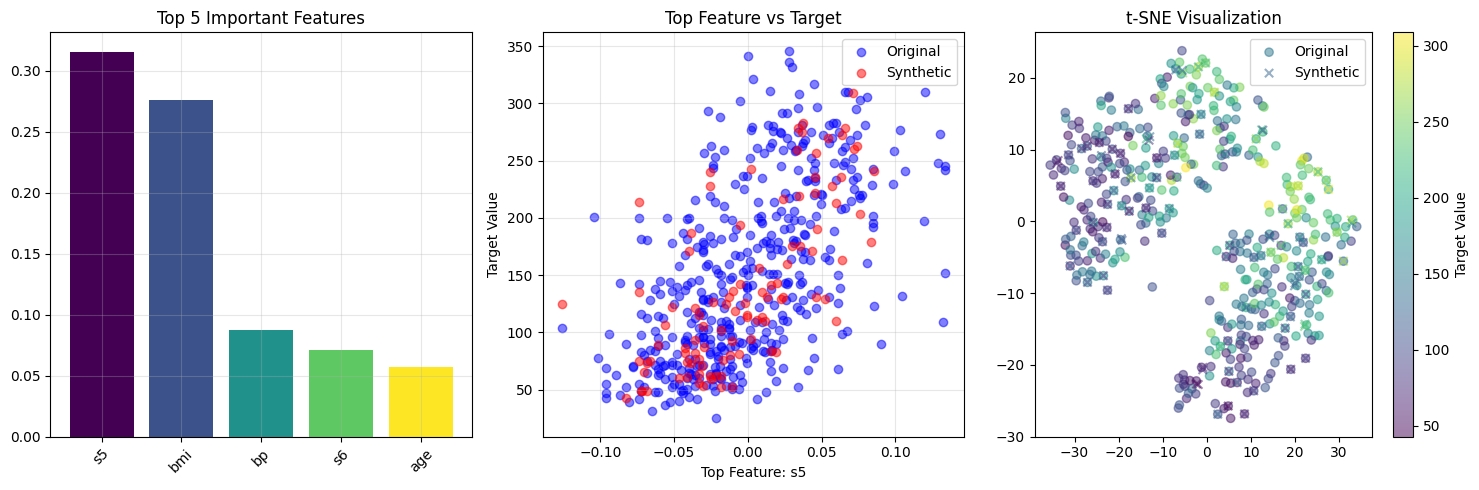

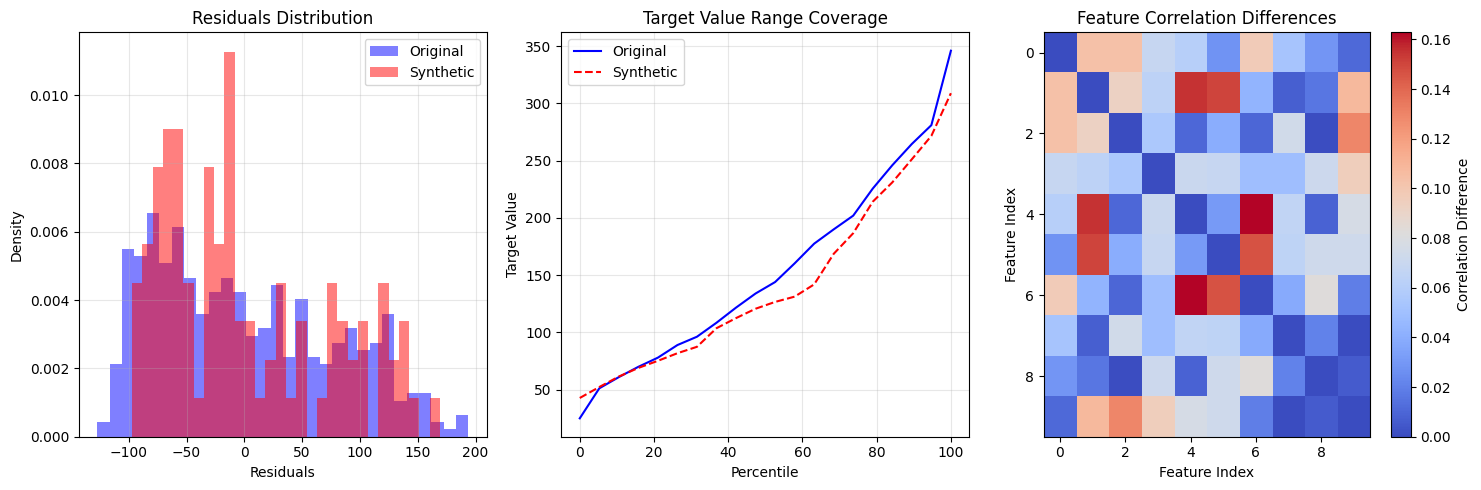

In [6]:
# Visualize results
visualize_regression_results(
    X, y, X_synth, y_synth,
    feature_names=load_diabetes().feature_names
)